По имеющимся историческим данным о продажах игр, оценках пользователей и экспертов, жанрах и платформах (например, Xbox или PlayStation) Данные представлены по 2016 год (данные не полные)

Отработаем принцип работы с данными

### Шаг 1 Импортируем библиотеки

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns


### Шаг 2(3) Откроем файл с данными и изучим общую информацию. Подготовим данные

In [2]:
df = pd.read_csv('./games.csv')
# преробразуем к нижнему регистру
df.columns = [x.lower() for x in df.columns]

df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [3]:
print(set(df.user_score))

{nan, '0.3', '2.7', '5.8', '3.1', '9', '2.3', '6.5', '4.2', '7.8', '2.9', '5.4', '1.4', '9.5', '1.5', '4', '0.9', '1.6', '7.7', '7.9', '4.9', '6.1', '6.8', '3.8', '8.8', '1.2', '8.2', '5.5', '3.6', '8.3', '1.8', '8', '0.5', '6.6', '5.6', '1.3', '9.7', '3.3', '3.4', '9.2', '7.3', '6.7', '7.2', '0.7', '2.4', '2.2', '2', '4.4', '1.1', '7.6', '5.2', 'tbd', '6.9', '5.9', '2.6', '4.3', '1', '6', '8.4', '4.8', '8.6', '8.9', '0.6', '4.6', '8.1', '5.7', '5.3', '0.2', '9.3', '2.5', '0', '3.7', '9.4', '3.2', '3.5', '6.3', '1.7', '6.2', '1.9', '8.7', '4.7', '7.4', '5', '9.6', '7.5', '6.4', '8.5', '4.5', '3.9', '7', '3', '2.8', '2.1', '7.1', '5.1', '4.1', '9.1'}


In [4]:
print(any(df.user_score == 0), any(df.critic_score == 0))
# все скоры не равны нулю, заменим НА на 0 для удобства, так как мы сможем из складвать, а 0 также будет идентифицировать пропущенные значения
# заменим tbd на на нан так как это отсутствующее значение
df.user_score = pd.to_numeric(df.user_score, errors='coerce')
df.user_score = df.user_score.fillna(0)
df.critic_score = df.critic_score.fillna(0)

False False


In [5]:
# df.Name = df.Name.astype(str)
# df.Platform = df.Platform.astype(str)
# приведём год к типу инт, так как год это целое то заменим пропущенные значения 1979, так как значение 1979 сможет однозначно идентифицировать пропуск и останется целым которое минимально

df.year_of_release = df.year_of_release.fillna(1979)
df.year_of_release = df.year_of_release.astype(int)
# приведём рейтинг к строковому типу, после замены пропущенных значений на НА со всем столбцом можно будет использовать функции работы со строками, а НА также будет идентифицировать пропущенные значения
df.rating = df.rating.fillna('NA')
df.rating = df.rating.astype(str)


In [6]:
# в продажах пропусков нет
any(df.na_sales.isna()), any(df.eu_sales.isna()), any(df.jp_sales.isna()), any(df.other_sales.isna())

(False, False, False, False)

In [7]:
_dfs = []
for c in df.columns:
    if not c.endswith('_sales'): continue
    county, _, _ = c.partition('_')
    new_df = df.copy()
    new_df['sales'] = new_df[c]
    new_df['country'] = county
    _dfs.append(new_df[['name', 'platform', 'year_of_release', 'genre', 'country',
                        'sales', 'critic_score', 'user_score', 'rating']])

In [8]:
ndf = pd.concat(_dfs)
ndf

,name,platform,year_of_release,genre,country,sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,na,41.36,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,na,29.08,0.0,0.0,NA
2,Mario Kart Wii,Wii,2008,Racing,na,15.68,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,na,15.61,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,na,11.27,0.0,0.0,NA
...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,other,0.00,0.0,0.0,NA
16711,LMA Manager 2007,X360,2006,Sports,other,0.00,0.0,0.0,NA
16712,Haitaka no Psychedelica,PSV,2016,Adventure,other,0.00,0.0,0.0,NA
16713,Spirits & Spells,GBA,2003,Platform,other,0.00,0.0,0.0,NA


In [9]:
# все продажи
df['all_sales'] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales

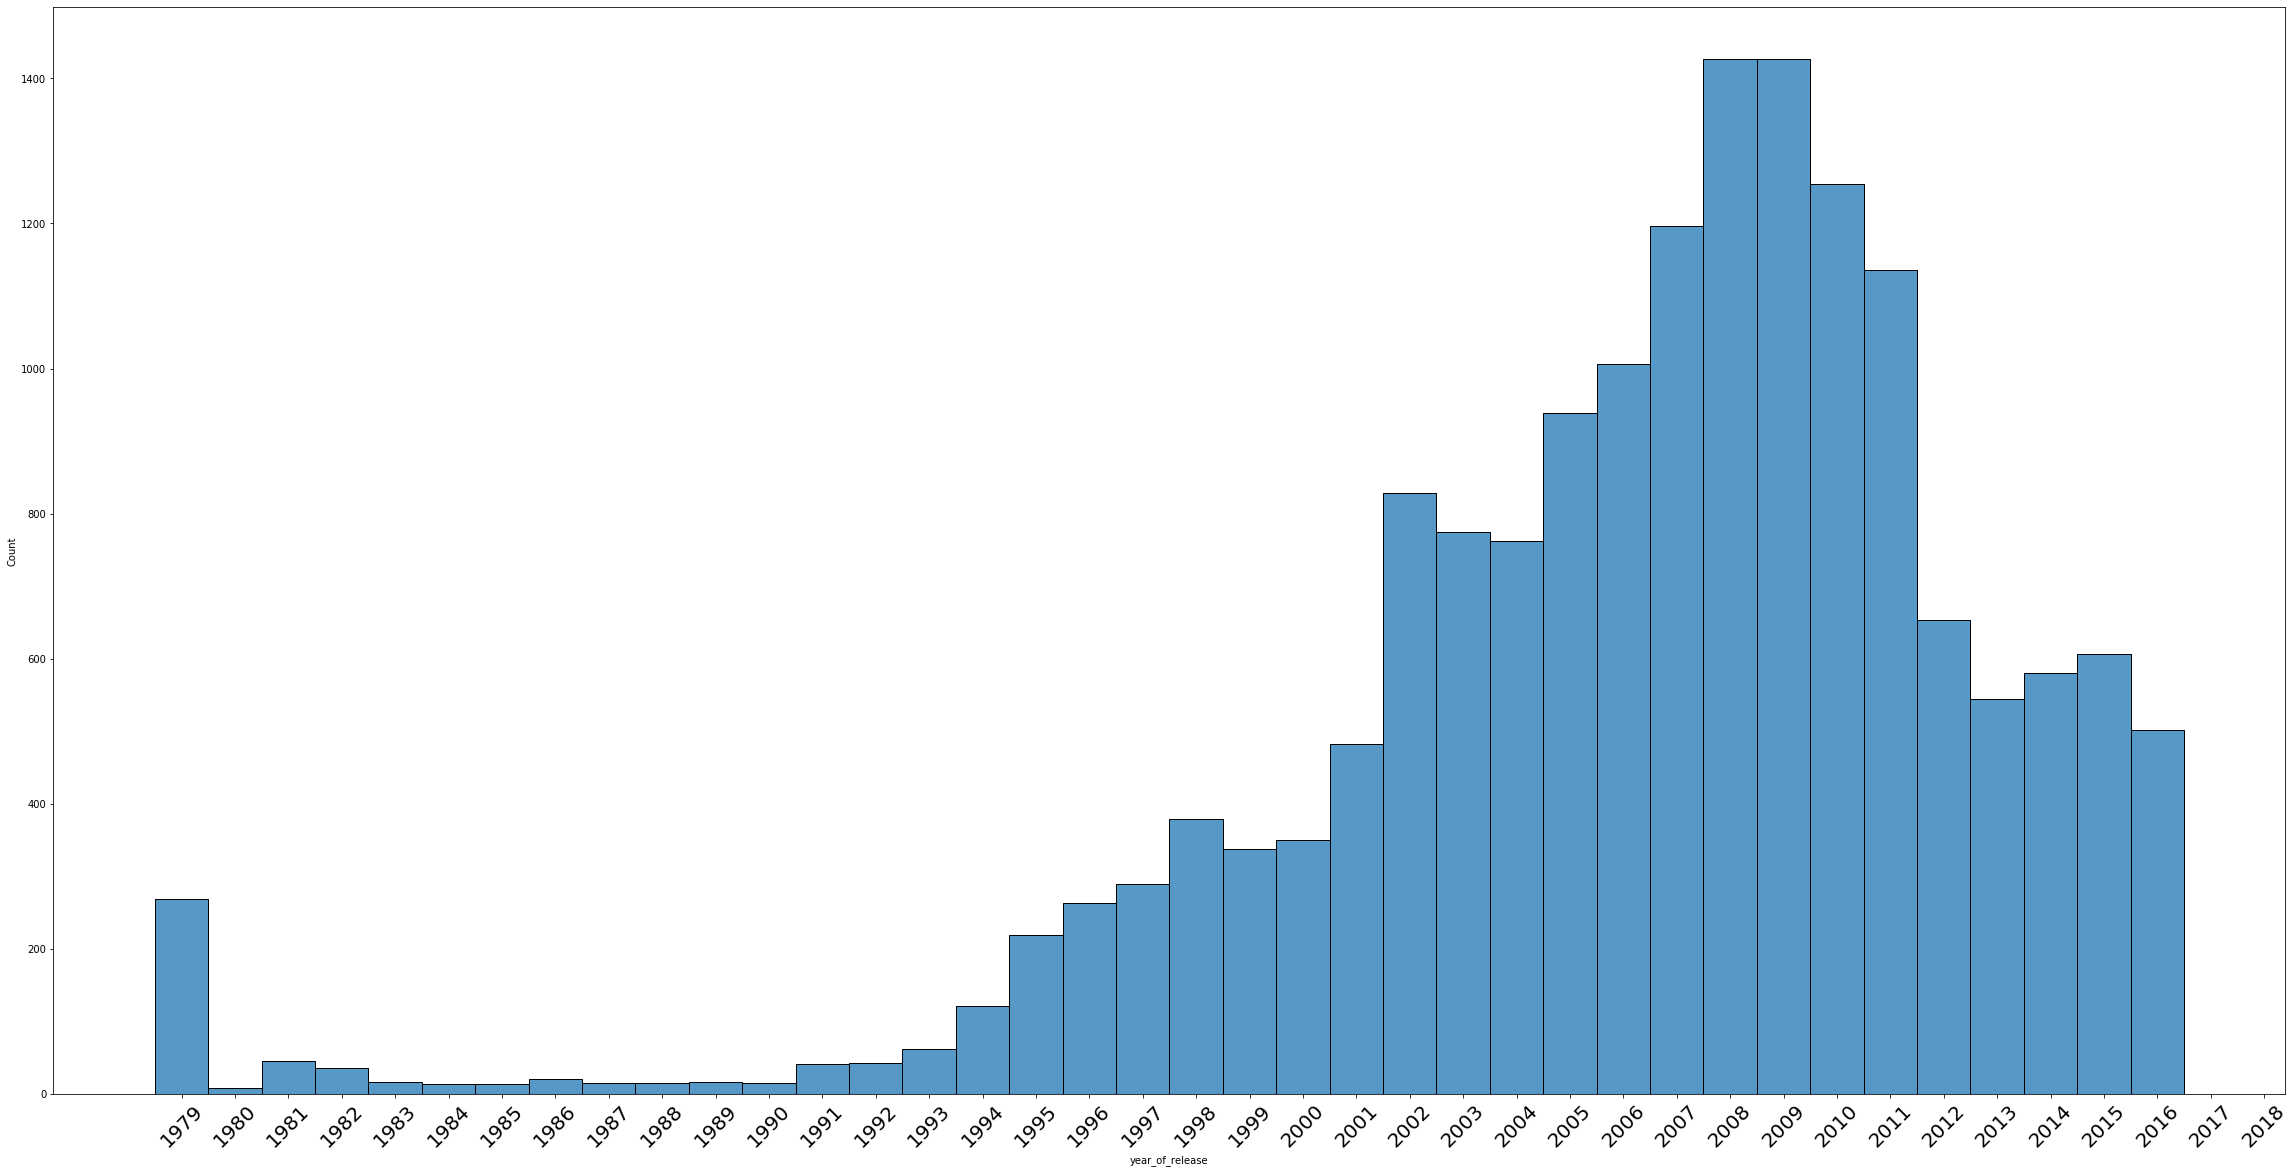

In [10]:
# ygs = {y: len(ydf) for y, ydf in df.groupby('year_of_release')}
fig_dims = (40, 20)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_xticks([y for y in range(1979, 2021)])
for item in ax.get_xticklabels():
    item.set_rotation(45)
    item.set_size(20)
sns.histplot(data=df, x="year_of_release", ax=ax, discrete=True, element='bars', legend='full')

In [11]:
# как видно 2008 и 2009 год были лучшими годами в истории продаж видеоигр. 

[None, None]

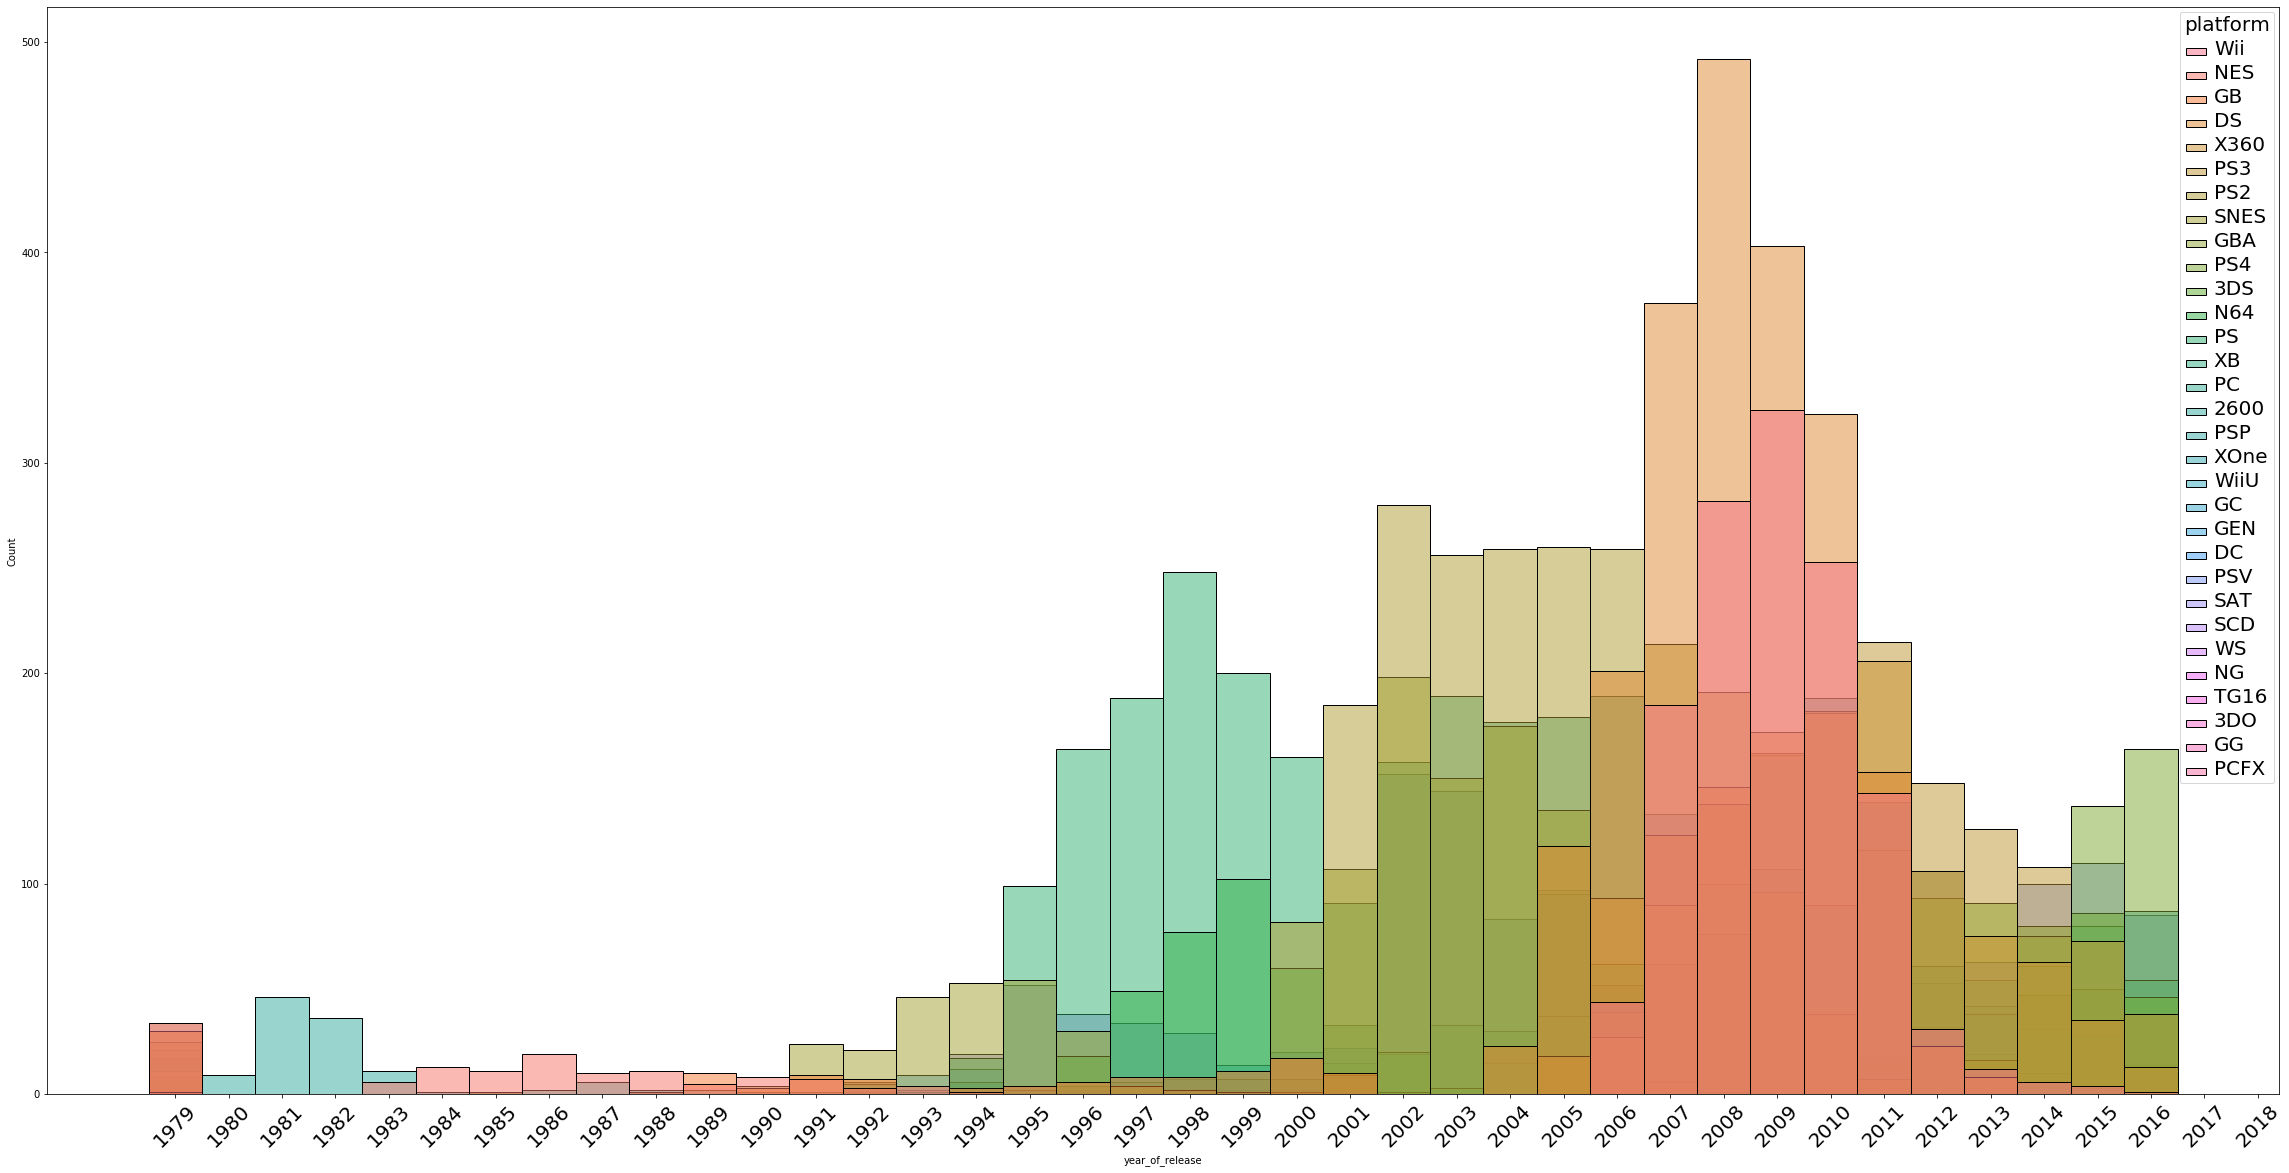

In [12]:
fig_dims = (40, 20)
fig, ax = plt.subplots(figsize=fig_dims)  
ax.set_xticks([y for y in range(1979, 2021)])
for item in ax.get_xticklabels():
    item.set_rotation(45)
    item.set_size(20)
ax.set_title(ax.get_title(), size=40)
gfg = sns.histplot(data=df, x="year_of_release", ax=ax, discrete=True, element='bars', legend='full', hue='platform')

# for legend text
plt.setp(gfg.get_legend().get_texts(), fontsize='20')  
  
# for legend title
plt.setp(gfg.get_legend().get_title(), fontsize='20')

In [13]:
# по данному графику можно выделить несколько больших интервалов с разными типами консолей. Это 1995 - 2000, 2001 - 2006, 2007 - 2011, 
# после восьмгого года идём общее уменьшение.
# Из чего можно сделать вывод что новые консоли появляются каждые шесть лет.

[None, None]

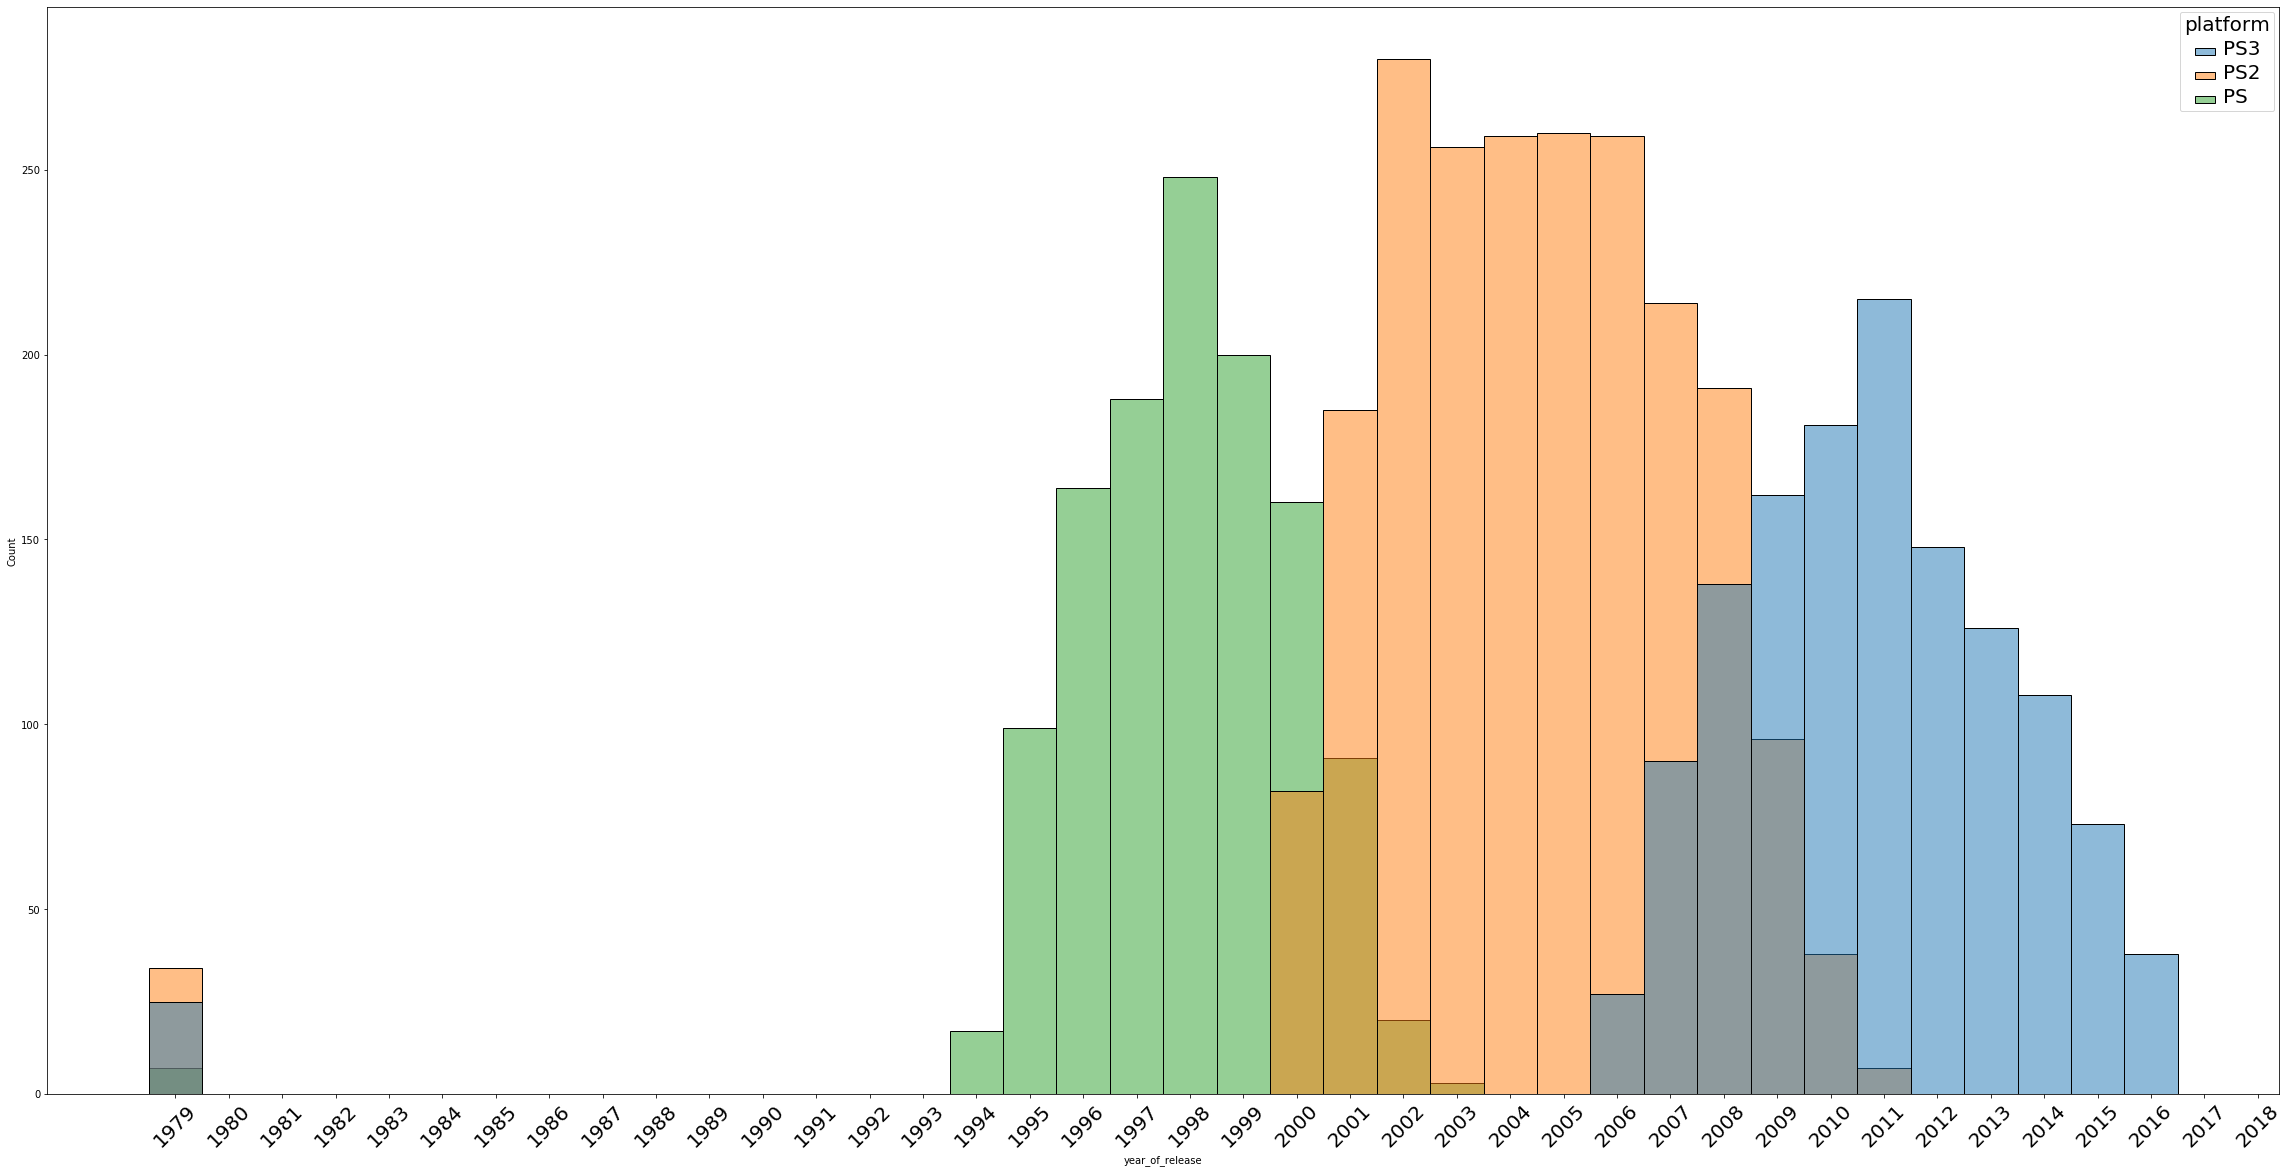

In [14]:
fig_dims = (40, 20)
fig, ax = plt.subplots(figsize=fig_dims)  
ax.set_xticks([y for y in range(1979, 2021)])
for item in ax.get_xticklabels():
    item.set_rotation(45)
    item.set_size(20)
ax.set_title(ax.get_title(), size=40)
gfg = sns.histplot(data=df[df.platform.isin({'PS', 'PS2', 'PS3'})], x="year_of_release", ax=ax, discrete=True, element='bars', legend='full', hue='platform')

# for legend text
plt.setp(gfg.get_legend().get_texts(), fontsize='20')  
  
# for legend title
plt.setp(gfg.get_legend().get_title(), fontsize='20')

In [15]:
# Tри полулярные в прошлом консоли у который сейчас нет продаж. Также более чётко виден цикл обнавления платформы в 6 лет.

[None, None]

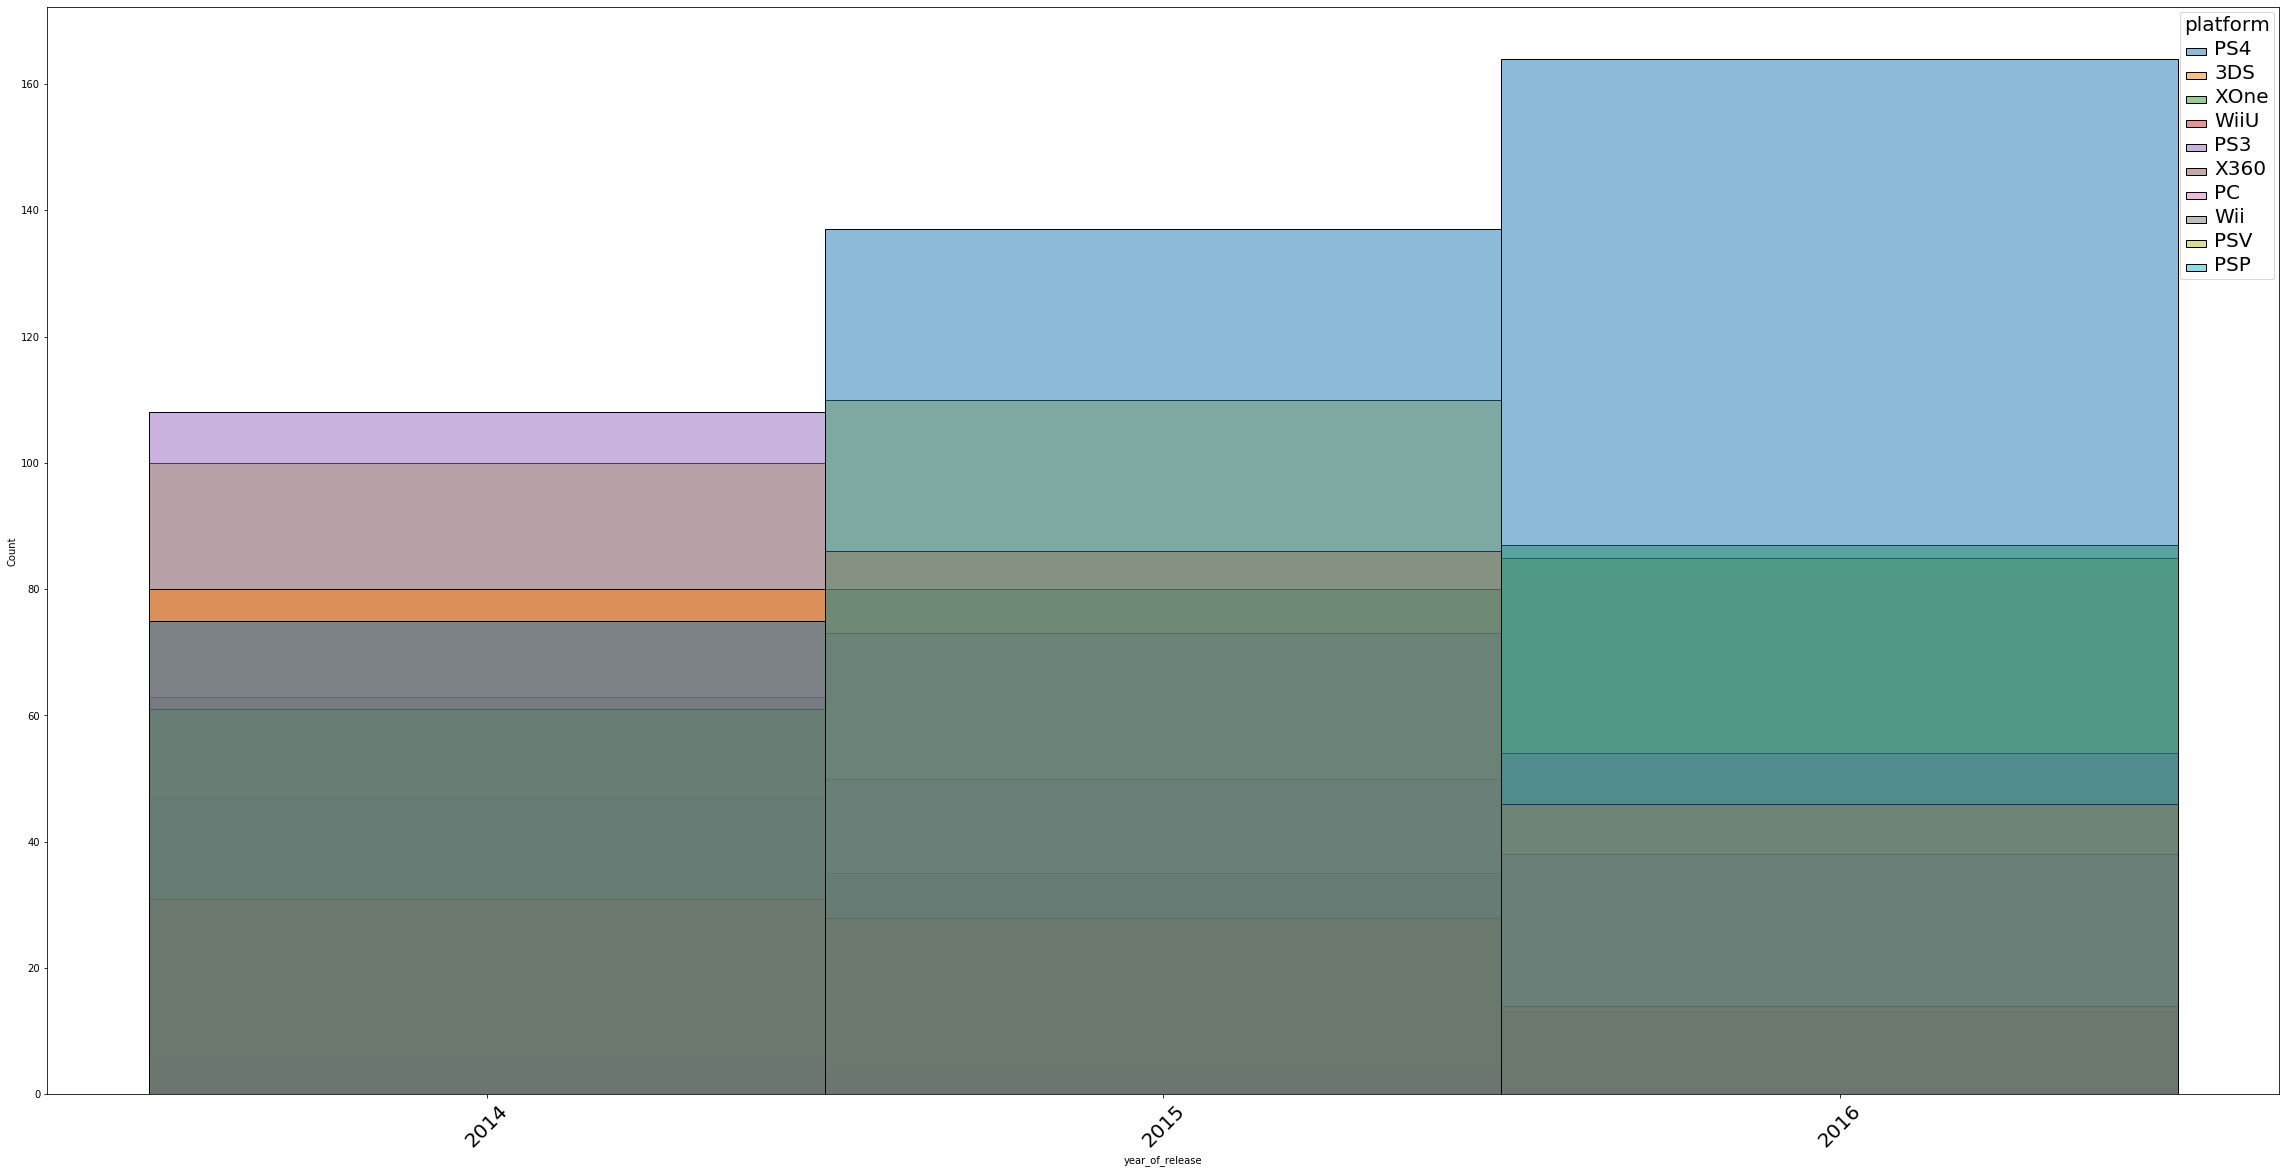

In [16]:
fig_dims = (40, 20)
fig, ax = plt.subplots(figsize=fig_dims)  
ax.set_xticks([y for y in range(1979, 2021)])
for item in ax.get_xticklabels():
    item.set_rotation(45)
    item.set_size(20)
ax.set_title(ax.get_title(), size=40)
gfg = sns.histplot(data=df[df.year_of_release.isin({2014, 2015, 2016})], x="year_of_release", ax=ax, discrete=True, element='bars', legend='full', hue='platform')

# for legend text
plt.setp(gfg.get_legend().get_texts(), fontsize='20')  
  
# for legend title
plt.setp(gfg.get_legend().get_title(), fontsize='20')

In [17]:
# для исключения выброса можно исключить PS4 так как её цикл начинается в 2015 и в 2016 ещё не заканчивается.

df_without_ps4 = df[~df.platform.isin({'PS4'})]

[None, None]

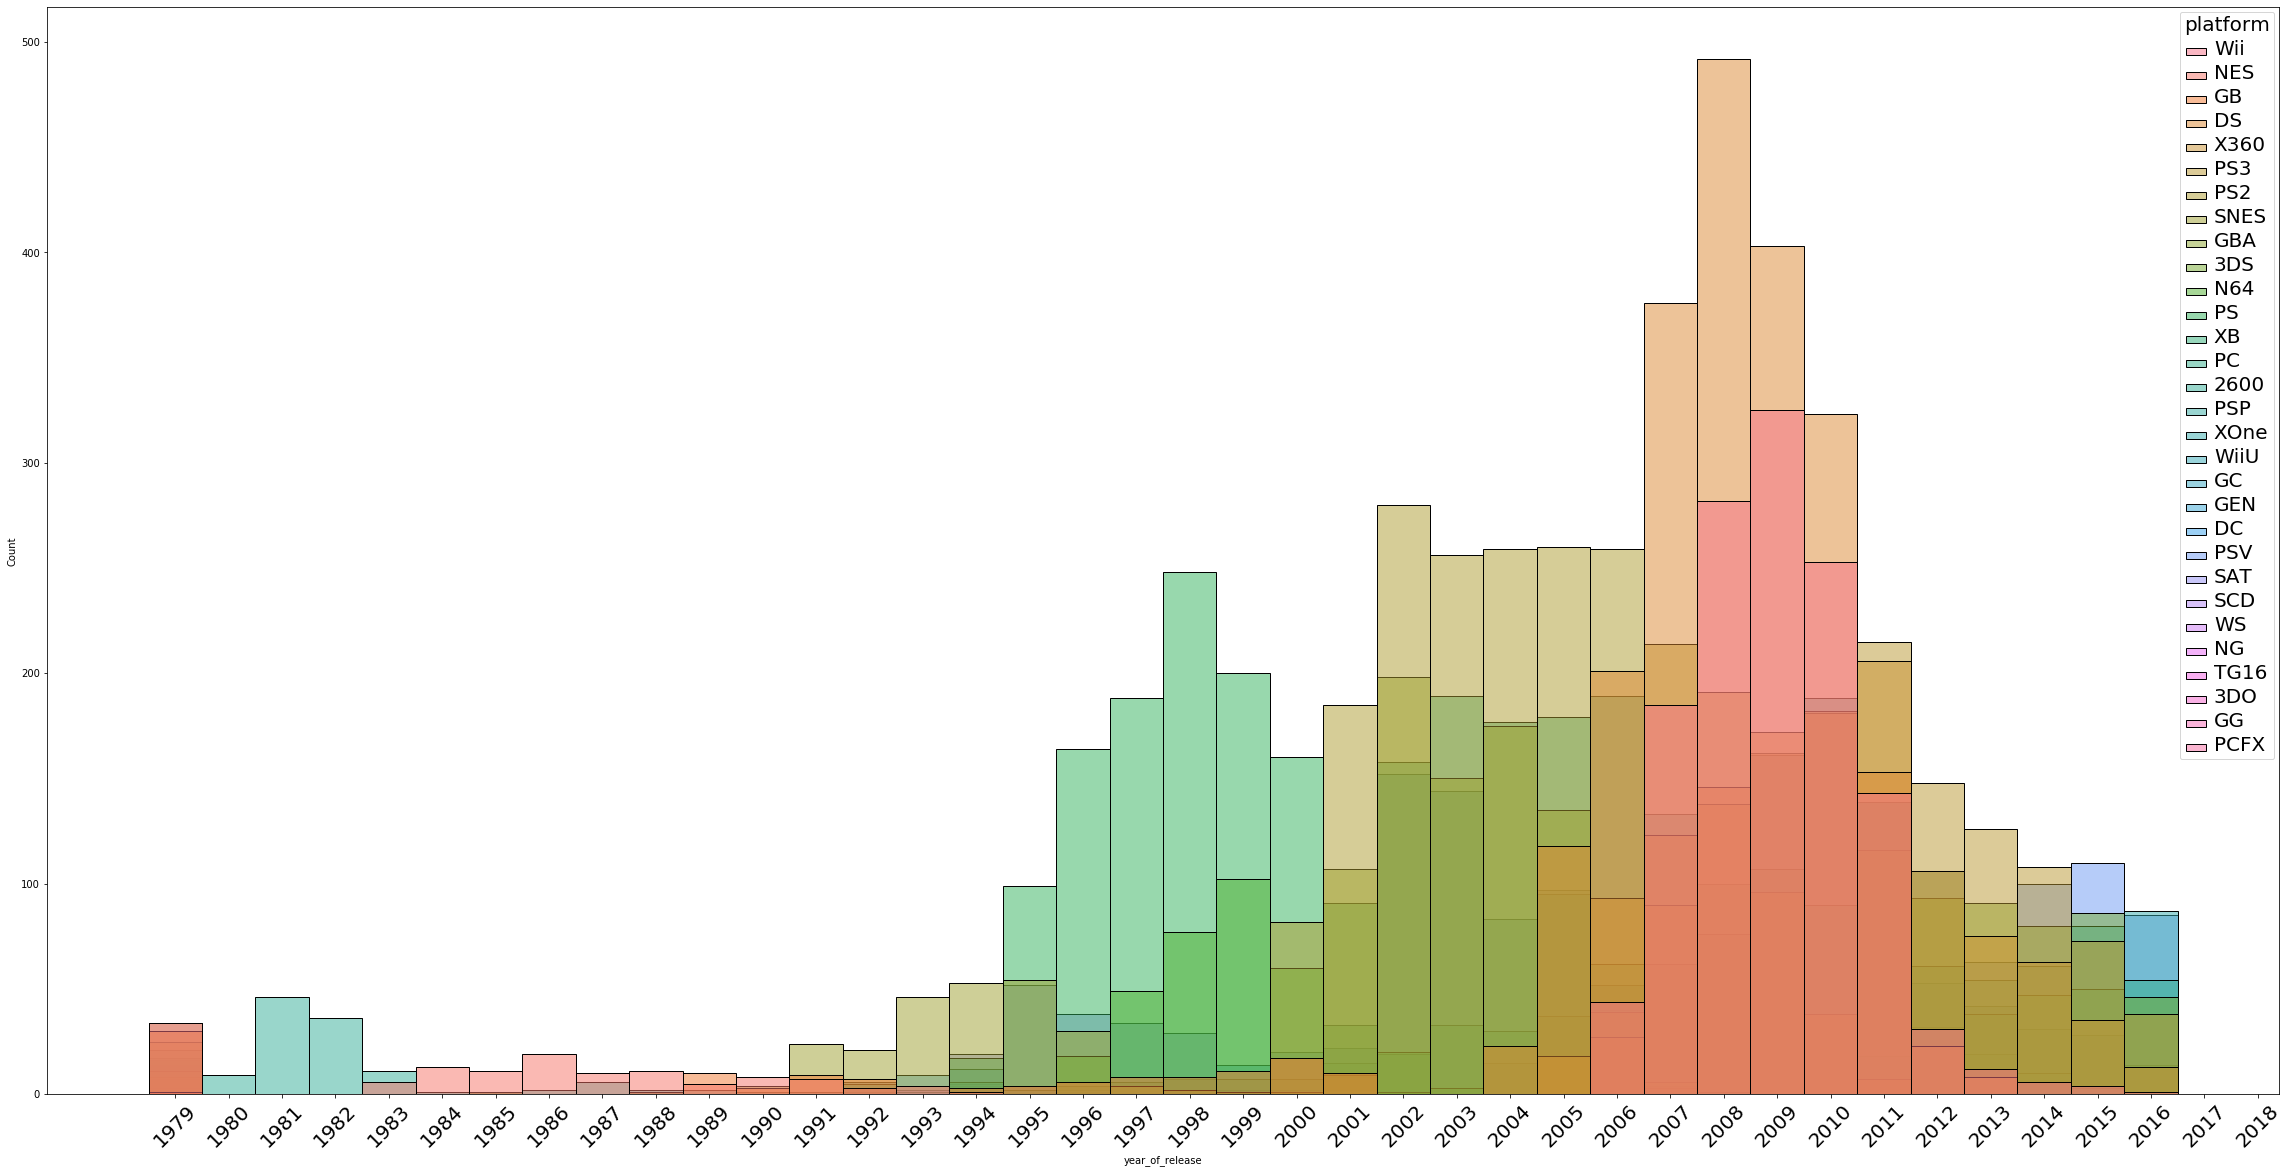

In [18]:
fig_dims = (40, 20)
fig, ax = plt.subplots(figsize=fig_dims)  
ax.set_xticks([y for y in range(1979, 2021)])
for item in ax.get_xticklabels():
    item.set_rotation(45)
    item.set_size(20)
ax.set_title(ax.get_title(), size=40)
gfg = sns.histplot(data=df_without_ps4, x="year_of_release", ax=ax, discrete=True, element='bars', legend='full', hue='platform')

# for legend text
plt.setp(gfg.get_legend().get_texts(), fontsize='20')  
  
# for legend title
plt.setp(gfg.get_legend().get_title(), fontsize='20')

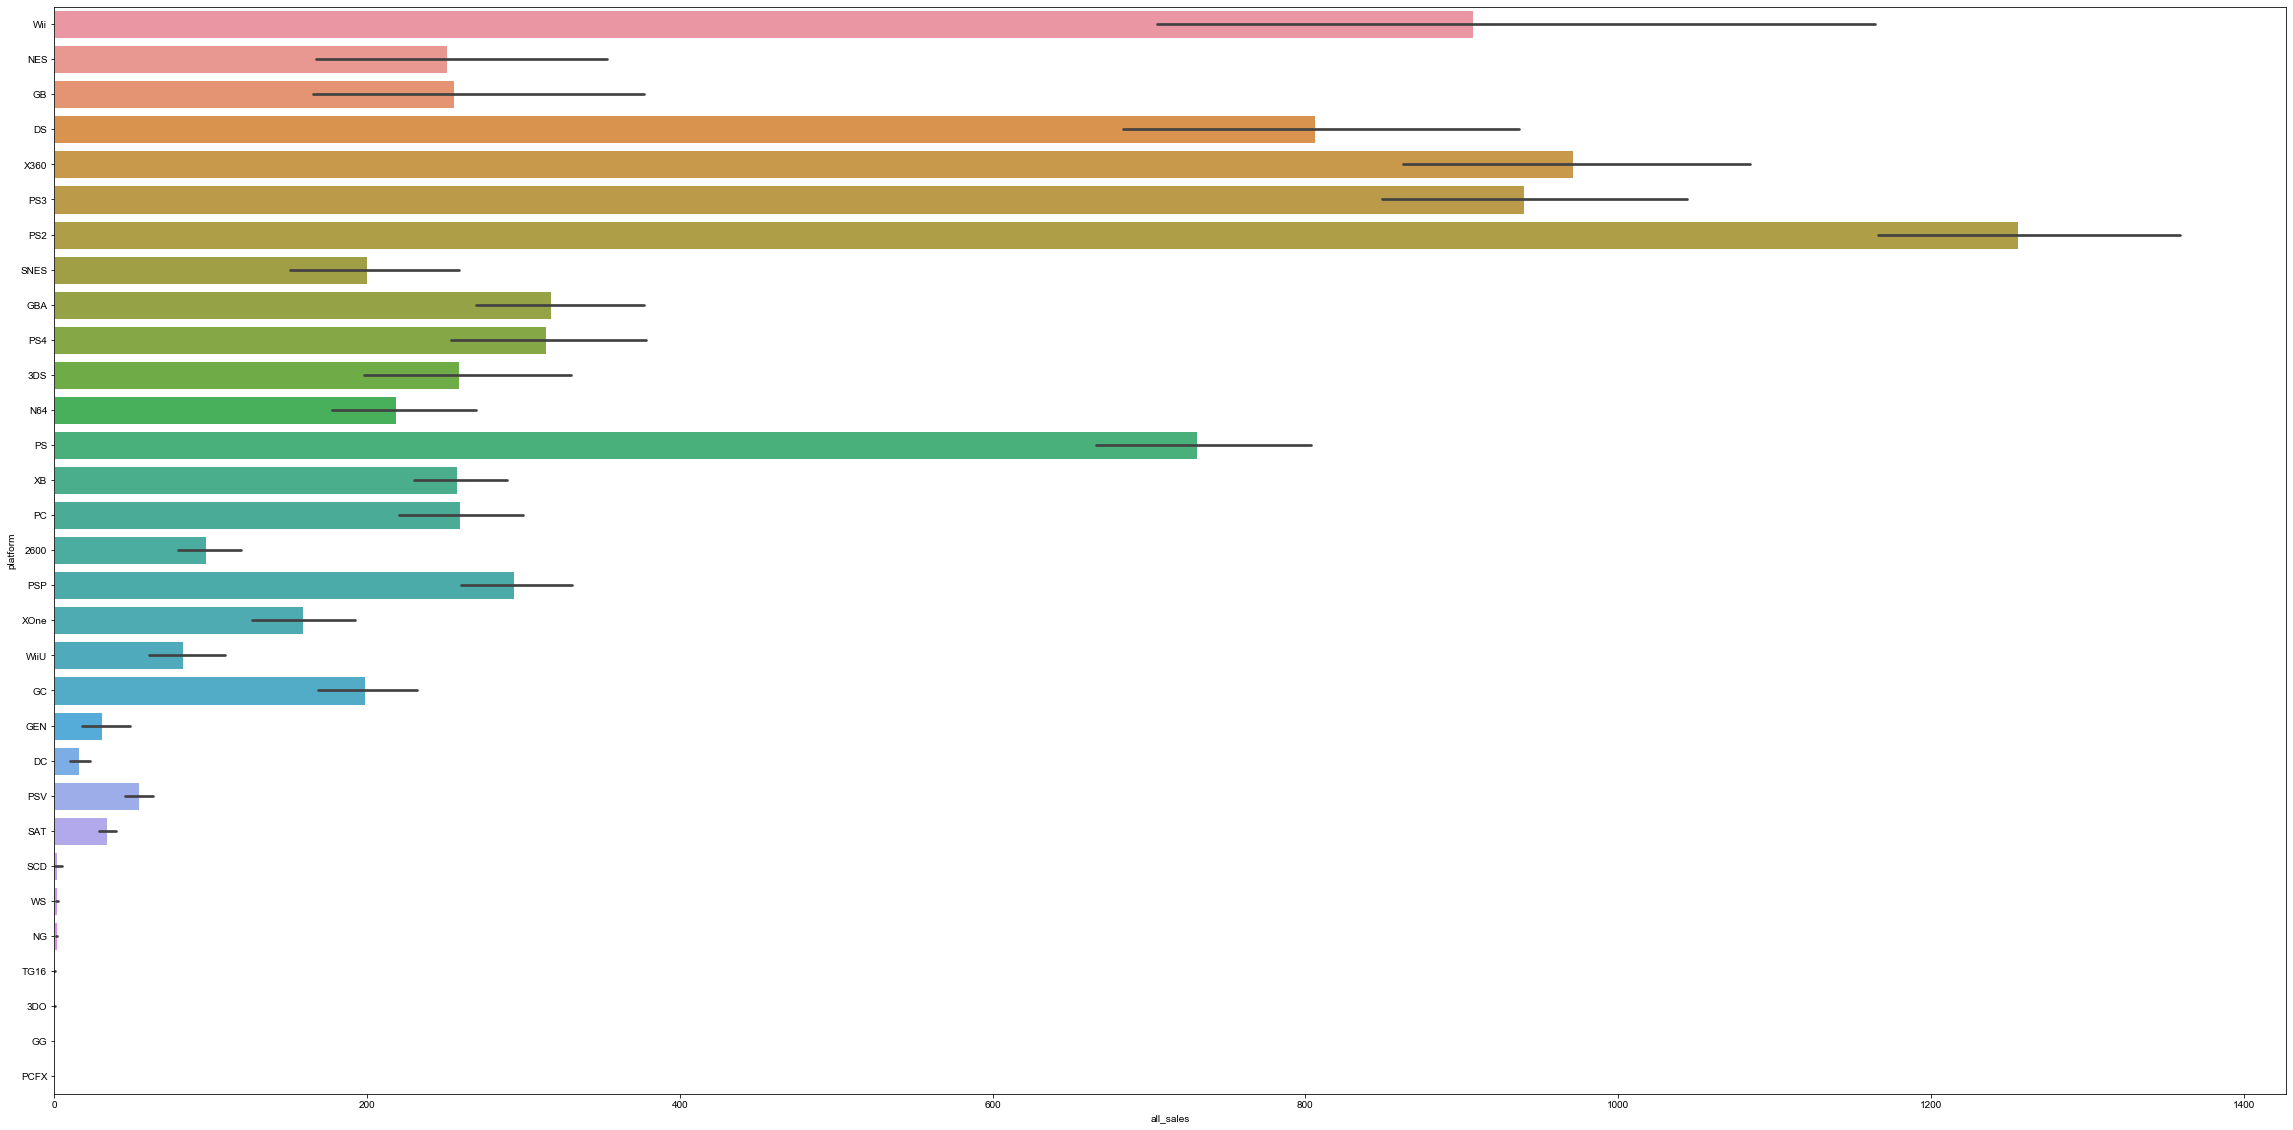

In [19]:
fig_dims = (40, 20)
fig, ax = plt.subplots(figsize=fig_dims)
#ax.set_title(ax.get_title, fontdict={'fontsize': 20})
sns.set(rc={"font.size":10,"axes.titlesize":20,"axes.labelsize":20, 'xtick.labelsize' : 16, 'ytick.labelsize' : 16})
gfg = sns.barplot(data=df, y="platform", x='all_sales', ax=ax, estimator=sum)

In [20]:
# наибольшее колличество продаж пришлось на PS2

### Шаг5 Составим портрет пользователя каждого региона

In [22]:
df_by_platform = {platform: platform_df for platform, platform_df in df.groupby(['platform'])}

top_5_platform_na = sorted([(pdf.na_sales.sum(), platform) for platform, pdf in df_by_platform.items()], reverse=True)[:5]
top_5_platform_jp = sorted([(pdf.jp_sales.sum(), platform) for platform, pdf in df_by_platform.items()], reverse=True)[:5]
top_5_platform_eu  = sorted([(pdf.eu_sales.sum(), platform) for platform, pdf in df_by_platform.items()], reverse=True)[:5]

In [23]:
# в NA по продажам лидирует икс бокс так как американцы поддерживают свою консоль. 
# В Японии популярны японские консоли, иксбокс вообще не вошёл в топ.
# В европе так как отсутствует своя консоль то люди выбирают то что нравится
top_5_platform_na, top_5_platform_jp, top_5_platform_eu

([(602.47, 'X360'),
  (583.84, 'PS2'),
  (496.9, 'Wii'),
  (393.49, 'PS3'),
  (382.4, 'DS')],
 [(175.57, 'DS'),
  (139.82, 'PS'),
  (139.2, 'PS2'),
  (116.55, 'SNES'),
  (100.66999999999999, '3DS')],
 [(339.29, 'PS2'),
  (330.29, 'PS3'),
  (270.76, 'X360'),
  (262.21000000000004, 'Wii'),
  (213.61, 'PS')])

In [24]:
# в северной Aмерике и Европе популярен action, в Японии JRPG.

df_by_genre = {genre: genre_df for genre, genre_df in df.groupby(['genre'])}

top_5_genre_na = sorted([(pdf.na_sales.sum(), genre) for genre, pdf in df_by_genre.items()], reverse=True)[:5]
top_5_genre_jp = sorted([(pdf.jp_sales.sum(), genre) for genre, pdf in df_by_genre.items()], reverse=True)[:5]
top_5_genre_eu  = sorted([(pdf.eu_sales.sum(), genre) for genre, pdf in df_by_genre.items()], reverse=True)[:5]
top_5_genre_na, top_5_genre_jp, top_5_genre_eu

([(879.01, 'Action'),
  (684.43, 'Sports'),
  (592.24, 'Shooter'),
  (445.49999999999994, 'Platform'),
  (407.27, 'Misc')],
 [(355.4100000000001, 'Role-Playing'),
  (161.43, 'Action'),
  (135.54, 'Sports'),
  (130.82999999999998, 'Platform'),
  (108.10999999999999, 'Misc')],
 [(519.13, 'Action'),
  (376.7900000000001, 'Sports'),
  (317.34000000000003, 'Shooter'),
  (236.50999999999996, 'Racing'),
  (212.74, 'Misc')])

In [25]:
set(df.rating)

{'AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'NA', 'RP', 'T'}

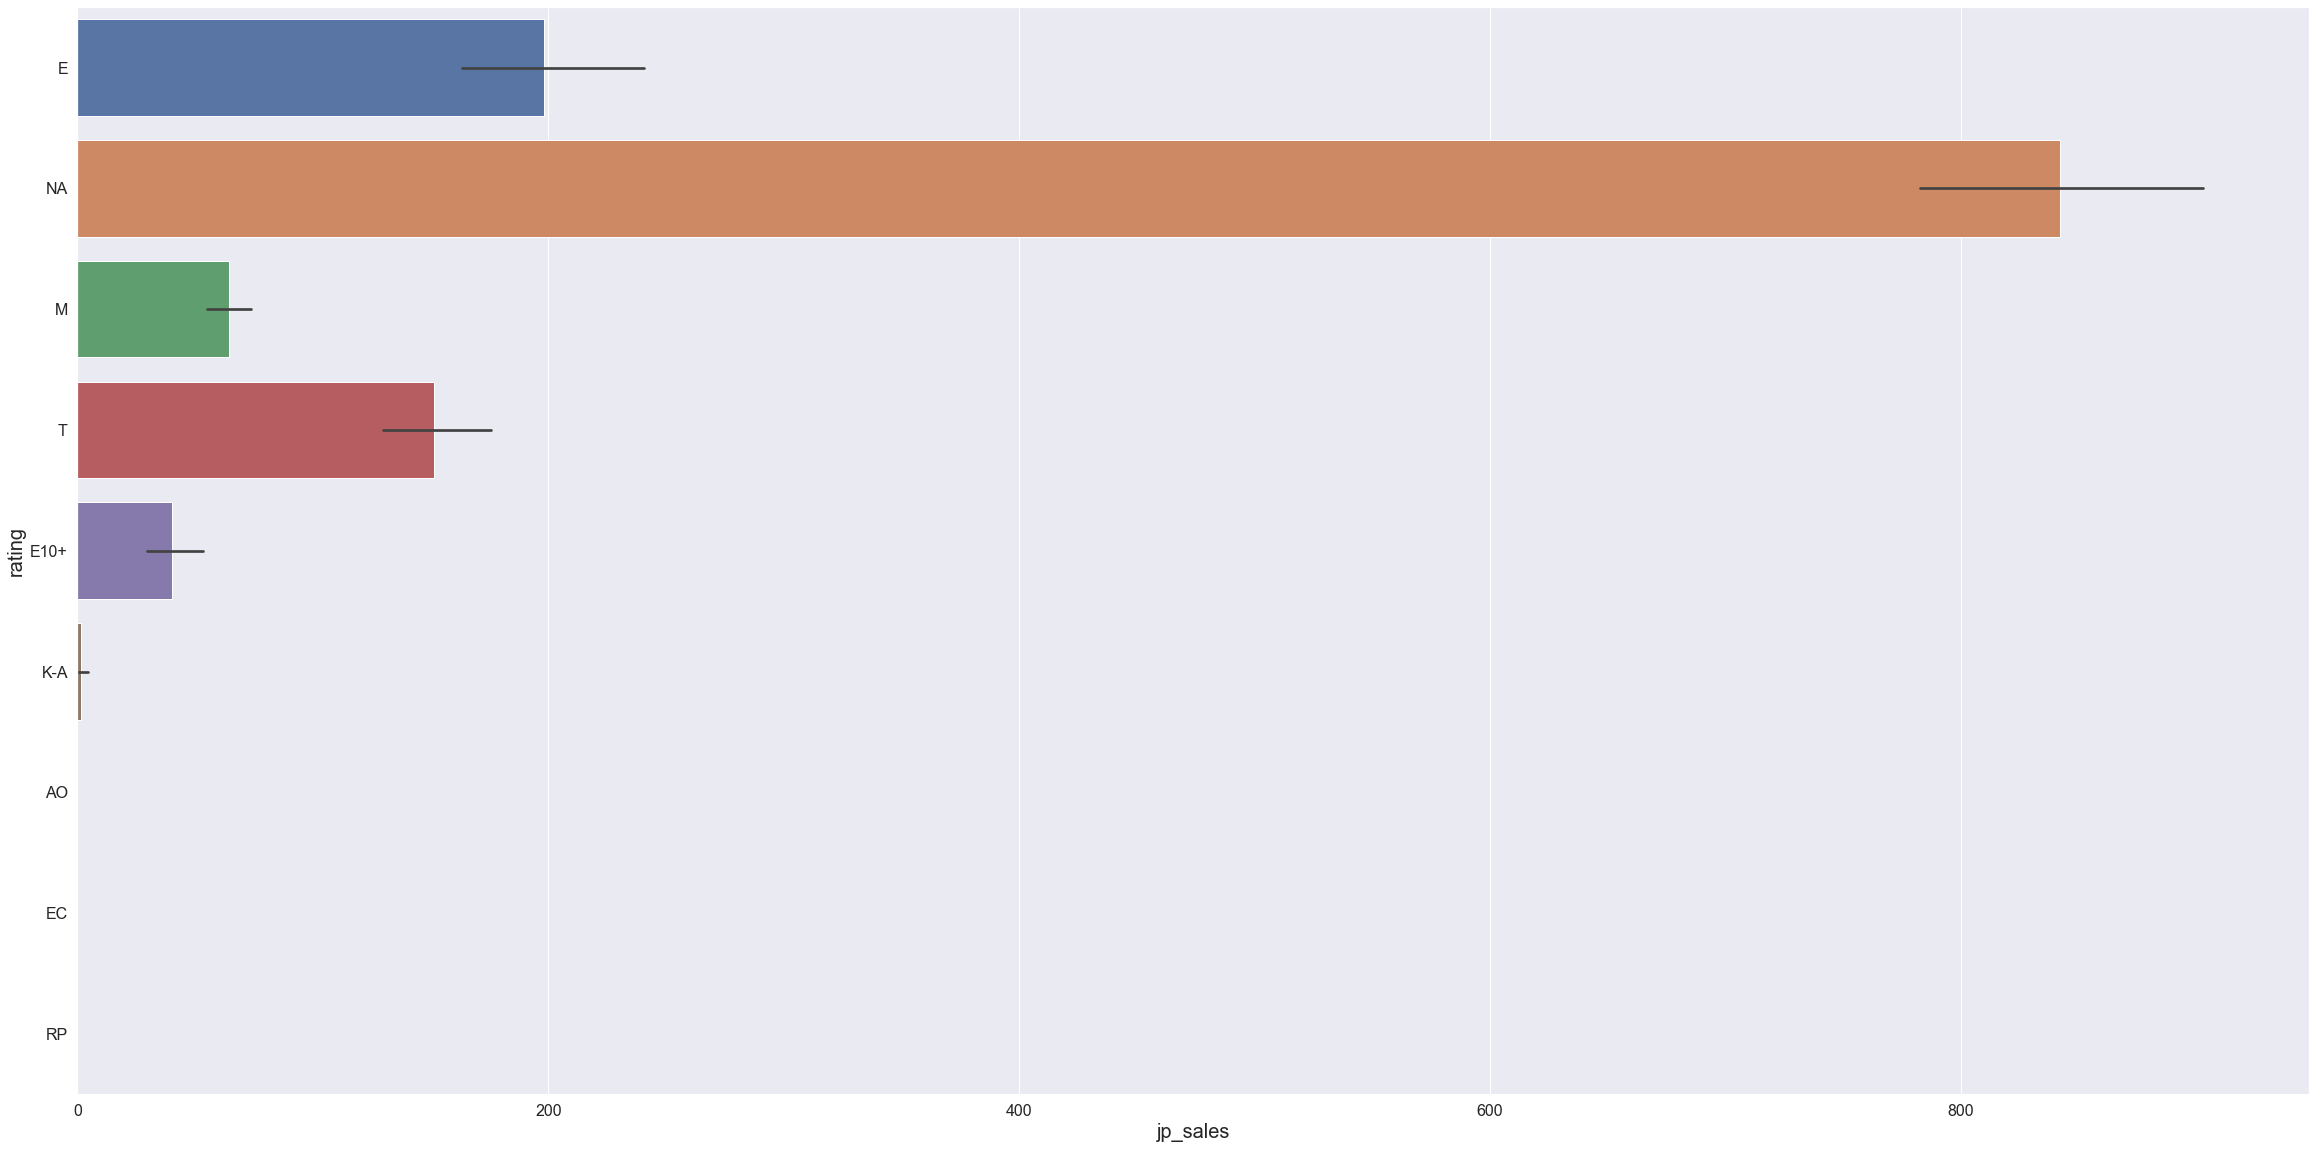

In [26]:
fig_dims = (40, 20)
fig, ax = plt.subplots(figsize=fig_dims)
#ax.set_title(ax.get_title, fontdict={'fontsize': 20})
sns.set(rc={"font.size":10,"axes.titlesize":20,"axes.labelsize":20, 'xtick.labelsize' : 16, 'ytick.labelsize' : 16})
gfg = sns.barplot(data=df, y="rating", x='jp_sales', ax=ax, estimator=sum)

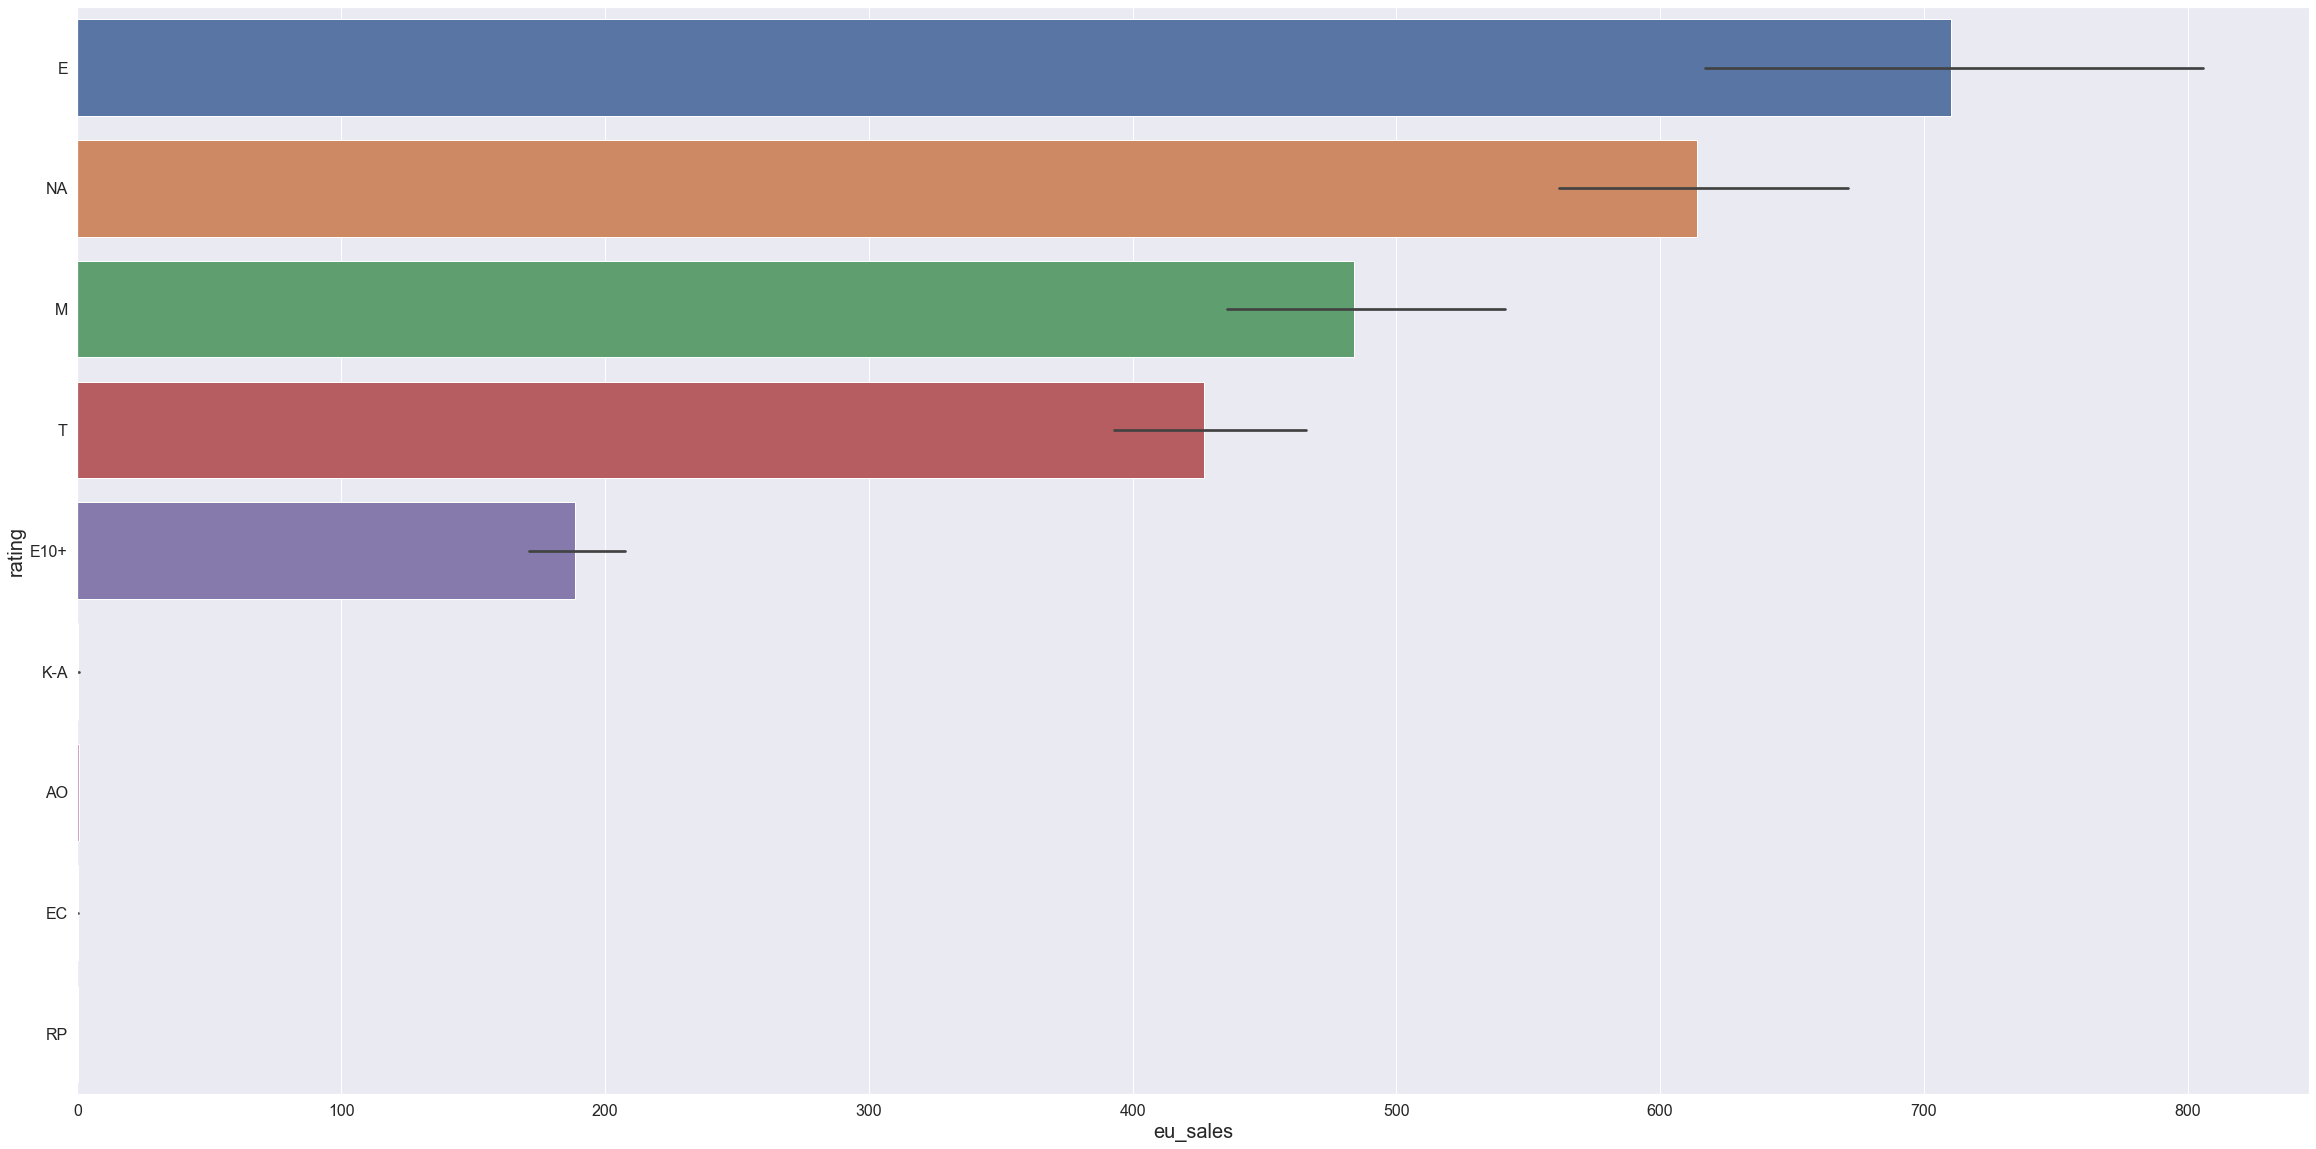

In [27]:
fig_dims = (40, 20)
fig, ax = plt.subplots(figsize=fig_dims)
#ax.set_title(ax.get_title, fontdict={'fontsize': 20})
sns.set(rc={"font.size":10,"axes.titlesize":20,"axes.labelsize":20, 'xtick.labelsize' : 16, 'ytick.labelsize' : 16})
gfg = sns.barplot(data=df, y="rating", x='eu_sales', ax=ax, estimator=sum)

In [28]:
# Как видно по графикам самые большие продажи по Европе и Америки у игр с рейтиногом Е на втором месте без рейтинга, отлчается только Япония там больше продаж без рейтинга.

### Шаг 6 Проведeм исследование статистических показателей

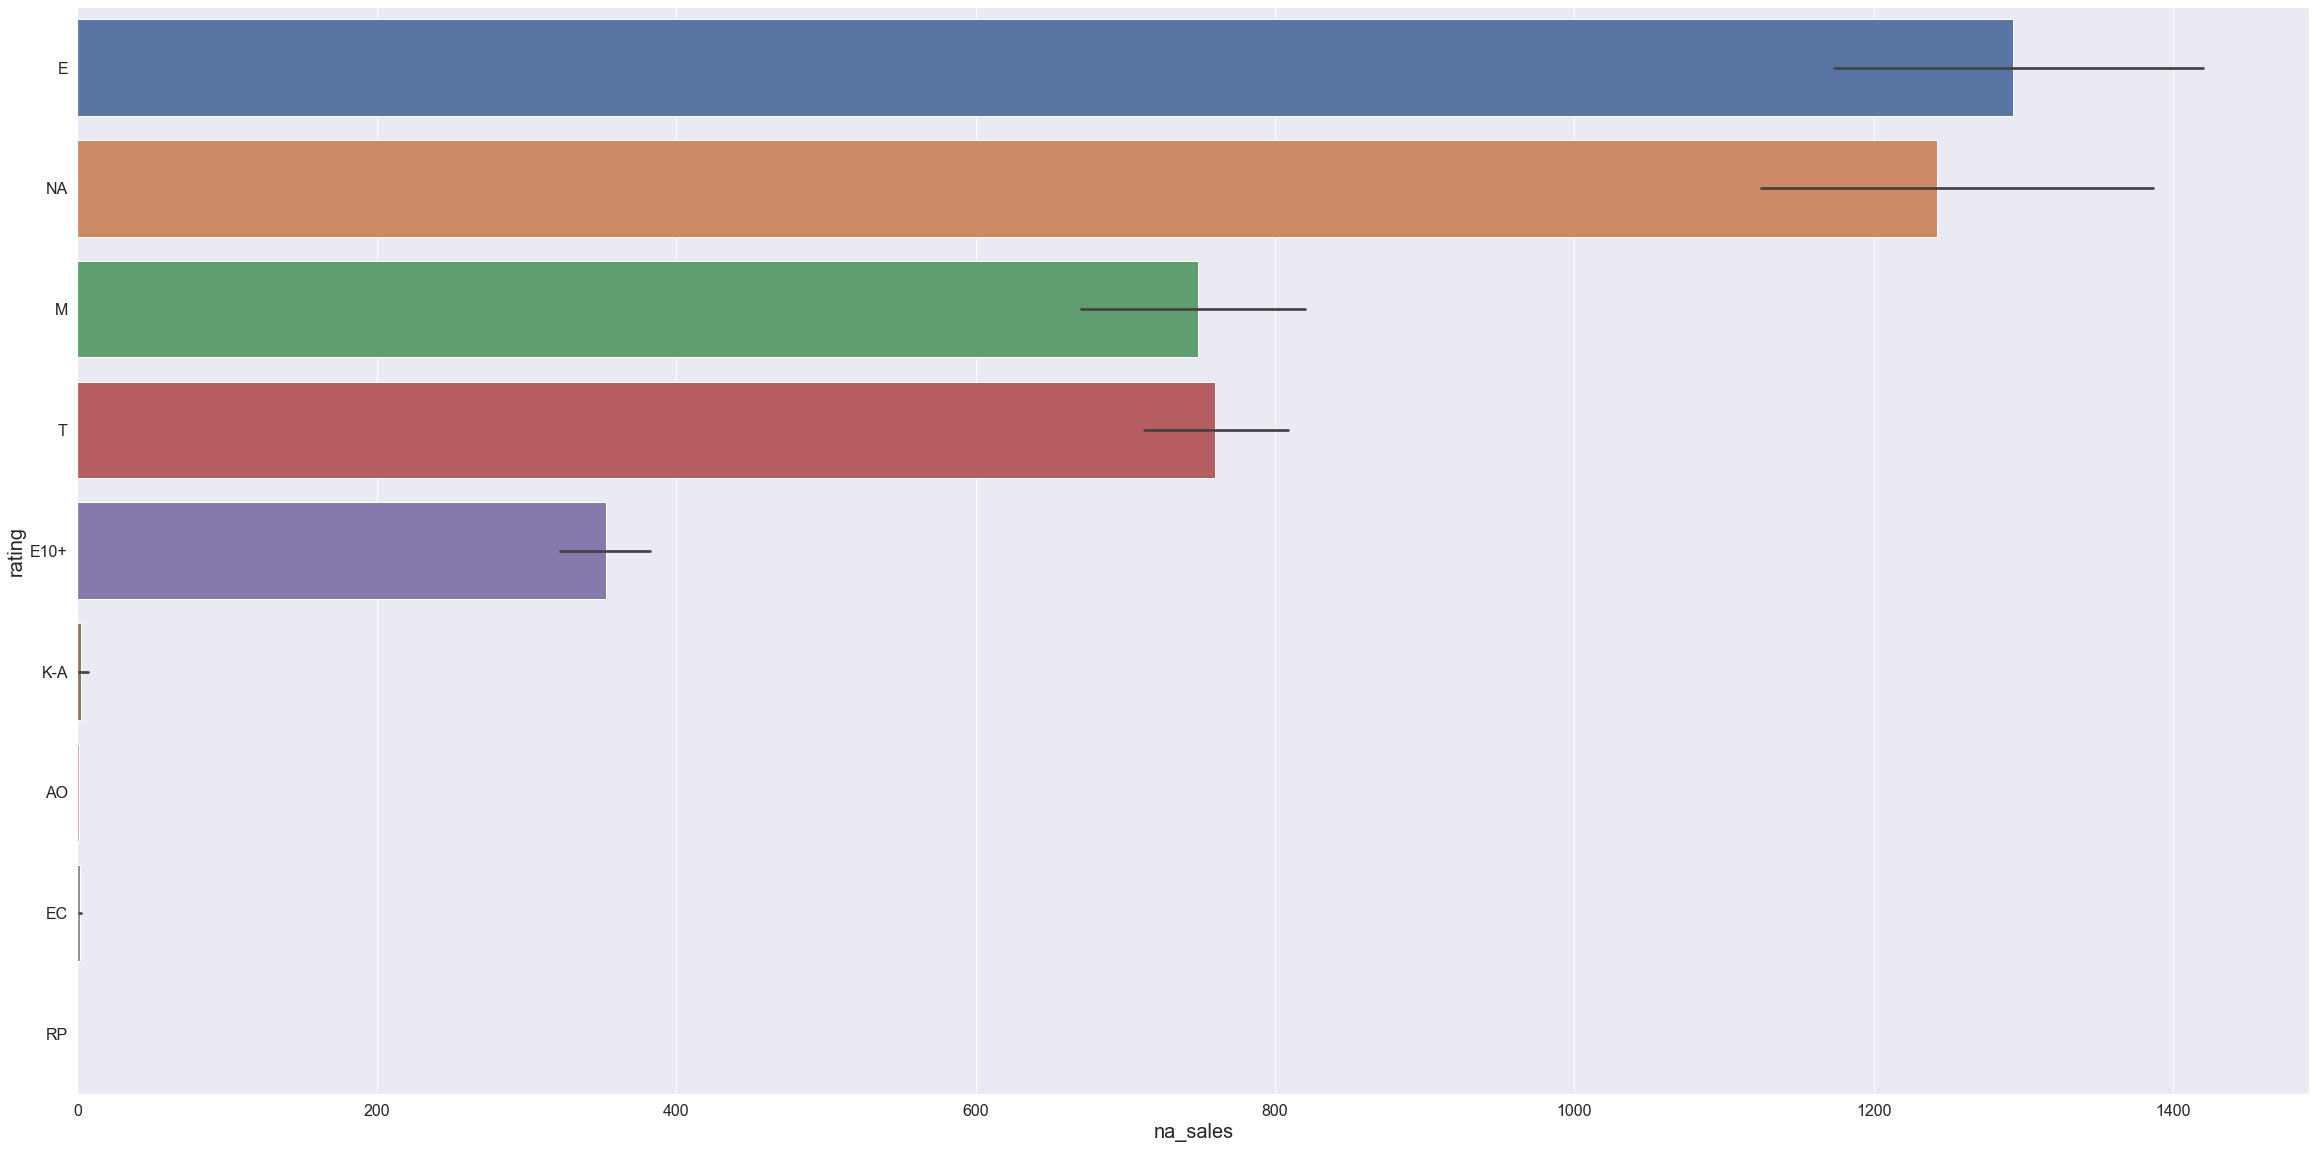

In [30]:
fig_dims = (40, 20)
fig, ax = plt.subplots(figsize=fig_dims)
#ax.set_title(ax.get_title, fontdict={'fontsize': 20})
sns.set(rc={"font.size":10,"axes.titlesize":20,"axes.labelsize":20, 'xtick.labelsize' : 16, 'ytick.labelsize' : 16})
gfg = sns.barplot(data=df, y="rating", x='na_sales', ax=ax, estimator=sum)

In [31]:
# построим скатерплот для оценки корреляции пользовательского рейтинга и рейтинга критиков.

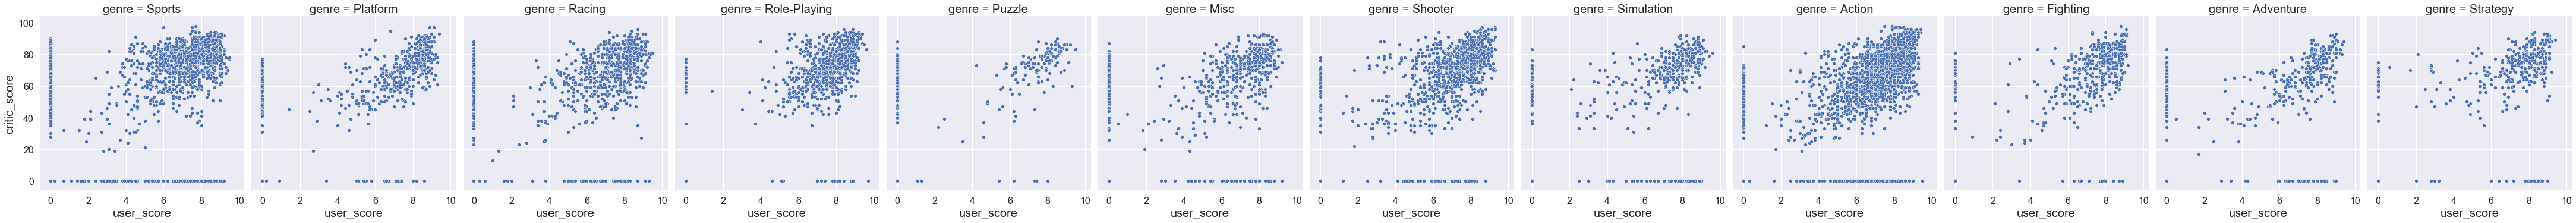

In [32]:

sns.relplot(
    data=df, x="user_score", y="critic_score",
    col="genre",
    kind="scatter"
)

In [33]:
# видно что кореляция в основном положительная 

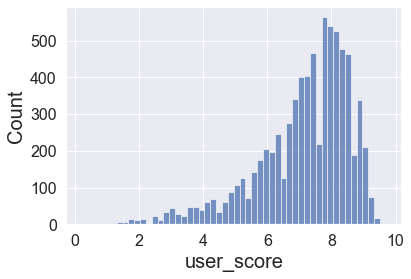

In [34]:
# sns.scatterplot(data=df[df.genre == ''], x="", y="")
sns.histplot(data=df[~(df.user_score == 0)], x='user_score')

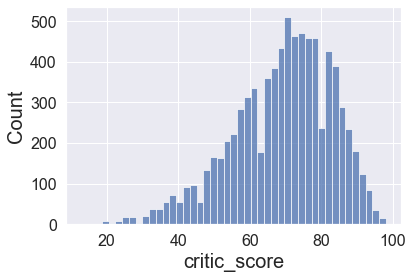

In [35]:
sns.histplot(data=df[~(df.critic_score == 0)], x='critic_score')

In [36]:
# как видно по гистограммам центры распределений смещены к боллее высокой оценке, но пользовательское распределение смещенно сильнее.

In [37]:
# critic score stat
crit_std = df[~(df.critic_score == 0)].critic_score.std()
crit_disp = crit_std ** 2
crit_mean = df[~(df.critic_score == 0)].critic_score.mean()
# user score stat
user_std = df[~(df.user_score == 0)].user_score.std()
user_disp = user_std ** 2
user_mean = df[~(df.user_score == 0)].user_score.mean()
print(f'critic stat:\nstd: {crit_std} var: {crit_disp} mean: {crit_mean}')
print(f'user stat:\nstd: {user_std} var: {user_disp} mean: {user_mean}')

critic stat:
std: 13.938164552843201 var: 194.2724311021347 mean: 68.96767850559173
user stat:
std: 1.4978730202886834 var: 2.2436235849087427 mean: 7.125984978258054


### Шаг 7  Проверим гипотезы
Гипотеза 1 "Среднии оценки XBox и PC одинаковые". Является нулевой так как нулевая гипотеза утверждает что изменений нет.

In [38]:
user_score_df = df[~(df.user_score == 0)]
user_score_df_xone = user_score_df[user_score_df.platform == 'XOne']
user_score_df_pc =  user_score_df[user_score_df.platform == 'PC']

In [39]:
from scipy.stats import ttest_ind
# Calculate the T-test for the means of *two independent* samples of scores.
# 
# This is a two-sided test for the null hypothesis that 2 independent samples
# have identical average (expected) values. This test assumes that the
# populations have identical variances by default.
_, pvalue = ttest_ind(user_score_df_xone.user_score, user_score_df_pc.user_score)
pvalue

1.3896435533548819e-05

Уровень значимости для проверки гипотизы составляет 0.05 pvalue, наше значение 0.000013 значительно меньше следовательно гипотиза о равенстве средних распределений пользовательских рейтингов для ПК и Xbox не верна.

Гипотеза 2 Средние пользовательские рейтинги жанров Action и Sports разные. Будем тестировать нулевую гипотезу о одинаковых распределениях.

In [40]:
user_score_df_action = user_score_df[user_score_df.genre == 'Action']
user_score_df_sports =  user_score_df[user_score_df.genre == 'Sports']
_, pvalue = ttest_ind(user_score_df_action.user_score, user_score_df_sports.user_score)
pvalue

0.10406951359049141

Pvalue боьше уровня значимости 0.05 значит мы не можем отклонить нулевую гипотезу о равенстве средних. Следовательно не можем принять альтернативную гипотезу о различии средних. 

### Шаг 8 Общий вывод

Планируя продажи на 2017 год необходимо учесть следующие важные моменты:

1. Высокое значение имеет региональный аспект связанный как выбираемыми жанрами игр так и с консолями особенно это ярко видно по лидерам потрбления игровой продукции: США и Японии. Следовательно стратегию стоить строить в первую очередь с учётом региональной специфики.

2. Наиболее популярные на данный момент платформы – это Sony PlayStation 4 и Xbox One. Они имеют большой потенциал роста на них стоит ориентироваться. 

3. Срок жизни платформ примерно 6 лет,  при планировании продаж на более долгий чем 1 год период это стоит учитывать

4. Оценки критиков оказывают существенное влияние как на оценки пользователей так и на продажи в целом этот фактор стоит учитывать как существенный и брать во внимание оценки критиков. Мы видим сильную корреляцию практически по всем жанрам между оценками криитков и оценками пользователей. 
